In [1]:
%load_ext autoreload
%autoreload 2
%run ~/FKMC/notebooks/notebook_preamble.py
%matplotlib inline
np.seterr(under = 'ignore')
from time import time

columnwidth = 246/72.27

plt.rc('font', family='sans-serif')
plt.rc('figure', dpi=200) #makes the plots display larger in the jupyter view
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8, direction='in', bottom=True, top=True)
plt.rc('ytick', labelsize=8, direction='in', left=True, right=True)
plt.rc('axes', labelsize=8)
plt.rc('figure', autolayout=False)

#data_location = Path('/data/users/tch14/pickled_data')
#figure_location = Path('/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs')

data_location = Path('~/HPC_data/pickled_data').expanduser()
#figure_location = Path('~/DropBox/Apps/Overleaf/Short Paper/figs/').expanduser()
figure_location = Path('~/git/FK_short_paper/figs').expanduser()

Imported pathlib::Path, os, munch::Munch, pickle, logging, itertools::count, matplotlib::colors
Names are pyplot = plt, matplotlib = mpl, numpy = np


[ 10  20  30  50  70 110 160 250]


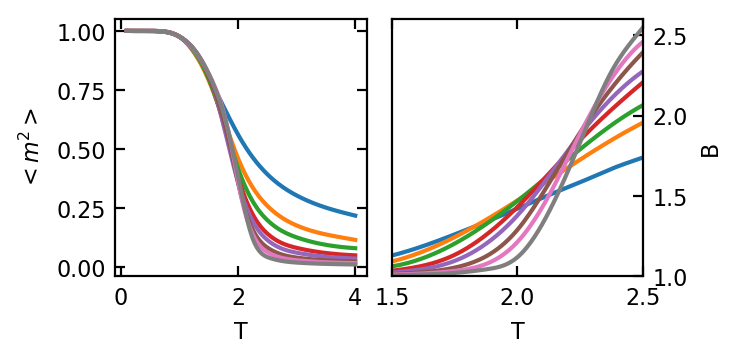

In [2]:
import pickle
from itertools import count
from scipy.interpolate import interp1d, UnivariateSpline

with open(data_location / 'binder_data.pickle', 'rb') as file: 
    d = oBinder = Munch(pickle.load(file))
print(d.Ns)
    
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def binder(ax):
    for i, N, c in zip(count(), d.Ns, colors):
        d.dB[i] = np.maximum(d.dB[i], d.dB[i].mean() * 0.1)
        binder_interped = UnivariateSpline(d.BX, d.B[i], w = 1/d.dB[i], s = len(d.BX))
        #ax.plot(d.BX, d.B[i], label = f'N = {N}', linewidth = 1, color = c)

        #spread(ax, d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)

        #plot the binder cumulant
        #ax.errorbar(d.BX, d.B[i], yerr = d.dB[i], color = c, linestyle = "None", marker = '.')
        #ax.plot(d.BX, d.B[i], label = f'N = {N}', color = c)

        x = np.linspace(d.BX[0], d.BX[-1], 200)
        axes[1].plot(x, binder_interped(x), color = c)
        
        ax.set(ylabel = '$<m^4>/<m^2>^2$', xlabel = 'T');
        ax.set(ylabel = 'B', xlabel = 'T');
        
def orderparam(ax):
    for i, N, c in zip(count(), d.Ns, colors):
        d.dM2[i] = np.maximum(d.dM2[i], d.dM2[i].mean() * 0.1)
        M_interped = UnivariateSpline(d.MX, d.M2[i], w = 1/(d.dM2[i] + 0.01*max(d.dM2[i])), s = len(d.MX))
        #axes[0].plot(d.MX, d.M2[i], linewidth = 1, color = c)
        #axes[0].errorbar(d.MX, d.M2[i], yerr = d.dM2[i] * 2, color = c, linestyle = "None", marker = '|', markersize = 0.5, label = f'N = {N}')

        x = np.linspace(d.MX[0], d.MX[-1], 200)
        ax.plot(x, M_interped(x), color = c)
        #spread(axes[0], d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)
        
        ax.set(ylabel = '$<m^2>$', xlabel = 'T');

f, axes = plt.subplots(1,2, gridspec_kw = dict(wspace = 0.1))
        
orderparam(axes[0])
binder(axes[1])
    

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")


axes[1].set(xlim = (1.5,2.5), ylim = (1,2.6));
    

width = columnwidth
height =  columnwidth / 2
f.set_size_inches(width, height)
f.savefig(figure_location / 'binder_plot.eps', bbox_inches='tight')

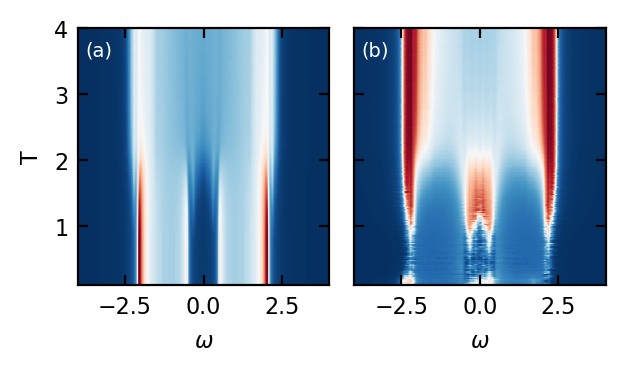

In [3]:
from FKMC.general import smooth

width = columnwidth
height =  columnwidth / 2
dpi = 150

f, axes = plt.subplots(1,2, sharey = 'all', gridspec_kw = dict(wspace = 0.1))

with open(data_location / 'Long_range_IPR_and_DOS.pickle', 'rb') as file: LR_data = pickle.load(file)

#plot the E-T DOS Diagram

ax = axes[0]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(LR_data.I, scale = 0.7, axis = -1)
E = smooth(LR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'T', xlabel = '$\omega$', ylim = (0.1, 4), xlim = (-4, 4))


#plot the E-T IPR diagram Diagram
ax = axes[1]
pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(xlabel = '$\omega$', xlim = (-4, 4))

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.03, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'white')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'band_opening.eps', bbox_inches='tight')

TJ_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Js, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.25, mu : 0, beta : 10.0, J : 0.0, U : 1, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7ff760e65190>, proposal : <function p_multi_site_uniform_reflect at 0x7ff7609ccb00>, accept_function : <function perturbation_accept at 0x7ff7609cce60>, warnings : True
TU_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Us, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.5, mu : 0, beta : 10.0, J : 5, U : 0.0, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all obje

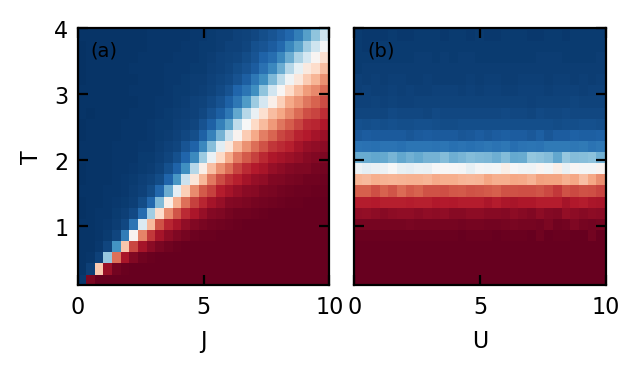

In [4]:
def log_params(data):
    print(f'Keys: {", ".join(data.keys())}')
    p = data.parameters
    m = data.MCMC_params
    print('Simulation Parameters')
    print(', '.join(f'{k} : {v}' for k,v in p.items() if k != 'J_matrix'))
    print('MCMC Parameters')
    print(', '.join(f'{k} : {v}' for k,v in m.items()))

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

width = columnwidth
height =  columnwidth / 2
dpi = 150
plot_binder = False


def TJ_phase_diagram(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
    
    print('TJ_data:')
    log_params(TJ_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TJ_data.hints.Mf_moments == ('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')
    M2 = TJ_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TJ_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TJ_data.Js, TJ_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'J')

def TU_phase_diagram(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
    
    print('TU_data:')
    log_params(TU_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TU_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TU_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TU_data.Us, TU_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = 'U')



def TAlpha_phase_diagram(ax):
    with open(data_location / 'TAlpha_phase_data.pickle', 'rb') as file: 
        TAlpha_data = pickle.load(file)   
    
    print('TAlpha_data:')
    log_params(TAlpha_data)
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TAlpha_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TAlpha_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TAlpha_data.alphas, TAlpha_data.Ts, Y, cmap="RdBu_r", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'T', xlabel = r'$\alpha$')

f, axes = plt.subplots(1,2, sharey = 'all', gridspec_kw = dict(wspace = 0.1))
TJ_phase_diagram(axes[0])
    
TU_phase_diagram(axes[1])
axes[1].set(ylabel = '')
    
#TAlpha_phase_diagram(axes[2])
#axes[2].set(ylabel = '')
    
axes[0].set(ylim = (0.1,4))
    
#plot the Binder crossings
#inset_ax = inset_axes(axes[1], width="30%", height="30%", loc=1, borderpad = 0.2)
#ax = axes[2]
#file = '/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/binder.npz'
#binder = Munch(np.load(file))
#inset_ax.plot(binder.T, binder.B, linewidth = 0.5)
#inset_ax.set(xlim = (1,3), ylabel = 'B', xlabel = 'T', xticks = [], yticks = [])

#inset_ax.yaxis.label.set_color('white')
#inset_ax.xaxis.label.set_color('white')

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')


    
f.set_size_inches(width, height)
f.savefig(figure_location / 'phase_diagram.eps', bbox_inches='tight')

TJ_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Js, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.25, mu : 0, beta : 10.0, J : 0.0, U : 1, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7ff73d536250>, proposal : <function p_multi_site_uniform_reflect at 0x7ff7609ccb00>, accept_function : <function perturbation_accept at 0x7ff7609cce60>, warnings : True

TU_data:
Keys: Mf_moments, sigma_Mf_moments, E_bins, IPR, DOS, total_jobs, Us, Ts, Ns, repeats, structure_names, parameters, MCMC_params, desc, structure_dims, hints, T
Simulation Parameters
N_sites : 128, t : 1, alpha : 1.5, mu : 0, beta : 10.0, J : 5, U : 0.0, normalise : True
MCMC Parameters
state : None, N_steps : 100000, N_burn_in : 10000, thin : 100, logger : <FKMC.montecarlo.Eigenspectrum_IPR_all obj

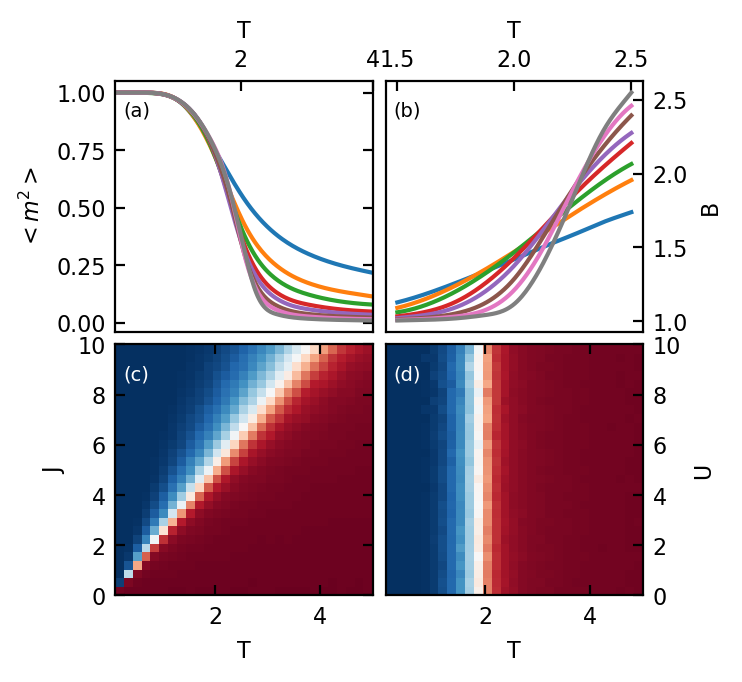

In [18]:
def TJ_phase_diagram_T(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
    
    print('TJ_data:')
    log_params(TJ_data)
    print('')
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TJ_data.hints.Mf_moments == ('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')
    M2 = TJ_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TJ_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TJ_data.Ts, TJ_data.Js, Y.T, cmap="RdBu", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'J', xlabel = 'T')

def TU_phase_diagram_T(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
    
    print('TU_data:')
    log_params(TU_data)
    print('')
    
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    #TU_data.hints.Mf_moments == ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep')
    M2 = TU_data.Mf_moments[-1, :, :, :, 2].mean(axis = (0)).T
    M4 = TU_data.Mf_moments[-1, :, :, :, 4].mean(axis = (0)).T
    Y = M2**2 / M4 if plot_binder else M2
    
    pcol = ax.pcolormesh(TU_data.Ts, TU_data.Us, Y.T, cmap="RdBu", norm = norm, linewidth=0, rasterized = True)
    #pcol.set_edgecolor('face')
    ax.set(ylabel = 'U', xlabel = 'T')

f, axes = plt.subplots(2,2, gridspec_kw = dict(wspace = 0.05, hspace = 0.05))
axes = axes.flatten()
    
orderparam(axes[0])
binder(axes[1])
TJ_phase_diagram_T(axes[2])
TU_phase_diagram_T(axes[3])


axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position("top")

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position("top")
    
axes[3].yaxis.tick_right()
axes[3].yaxis.set_label_position("right")

  
for letter, ax, c in zip('abcdef...', axes.flatten(), 'kkww'):
    ax.text(0.03, 0.92, f"({letter})", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = c)

axes[0].set(xlim = (0.1,4))
    
f.set_size_inches(columnwidth, columnwidth)
f.savefig(figure_location / 'phase_diagram2.eps', bbox_inches='tight')

In [6]:
with open(data_location / 'Short_range_IPR_and_DOS_processed.pickle', 'rb') as file: 
    oLR = pickle.load(file)

o = oLR

o.sI = [None for _ in o.Ns] 
o.sE = [None for _ in o.Ns]

for i, N in enumerate(o.Ns):
    
    E = np.where(o.E_hist[i] > 0, o.E_hist[i], 1)
    I = np.where(o.E_hist[i] > 0, o.IPR_hist[i]/E, 0)

    o.sI[i] = smooth(I, scale = 64 / N, axis = -1)
    o.sE[i] = smooth(o.E_hist[i], scale = 64/N, axis = -1) / N

T = 1.2758793969849247


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


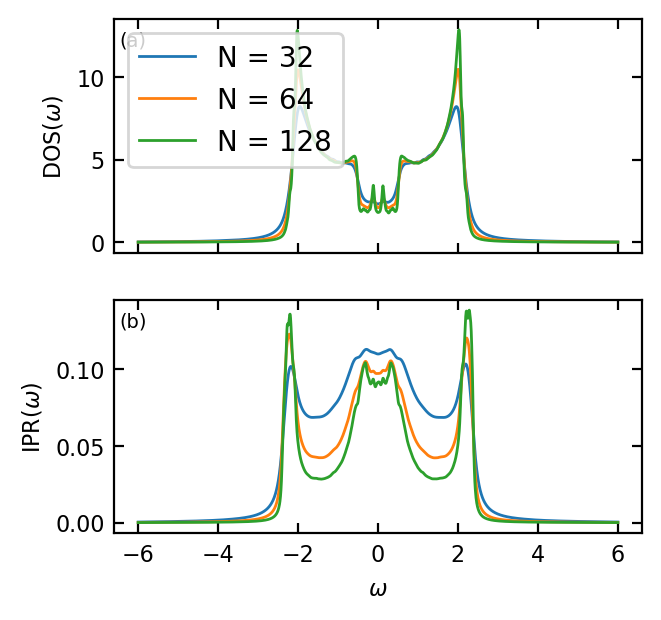

In [7]:
width = columnwidth
height =  columnwidth
dpi = 150
linewidth = 1

f, axes = plt.subplots(2,1, sharex = 'all', gridspec_kw = dict(hspace = 0.2))

i = -1
T_select = 60
T = o.Ts[T_select]
print(f'T = {T}')

for i, N in enumerate(o.Ns):
    if N < 32: continue
    
    axes[0].plot(o.E_bins[1:], o.sE[i][T_select, :], label = f'N = {N}', linewidth = linewidth)
    axes[1].plot(o.E_bins[1: ], o.sI[i][T_select, :], linewidth = linewidth)


axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

axes[0].legend()

#inset_ax = inset_axes(axes[1], width="30%", height="50%", loc=1, borderpad = 0.2)
#inset_ax.set(xlim = (1,3), ylabel = 'IPR', xlabel = 'N', xticks = [], yticks = [])

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.01, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge.eps', bbox_inches='tight')

In [8]:
with open(data_location / f'local_runs_processed_smoothed_june2.pickle', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    o_local_runs = Munch(pickle.load(f))

Text(0.5, 0.98, 'T = 1.5, J = 5, U = 5, M**2 = 0.81')

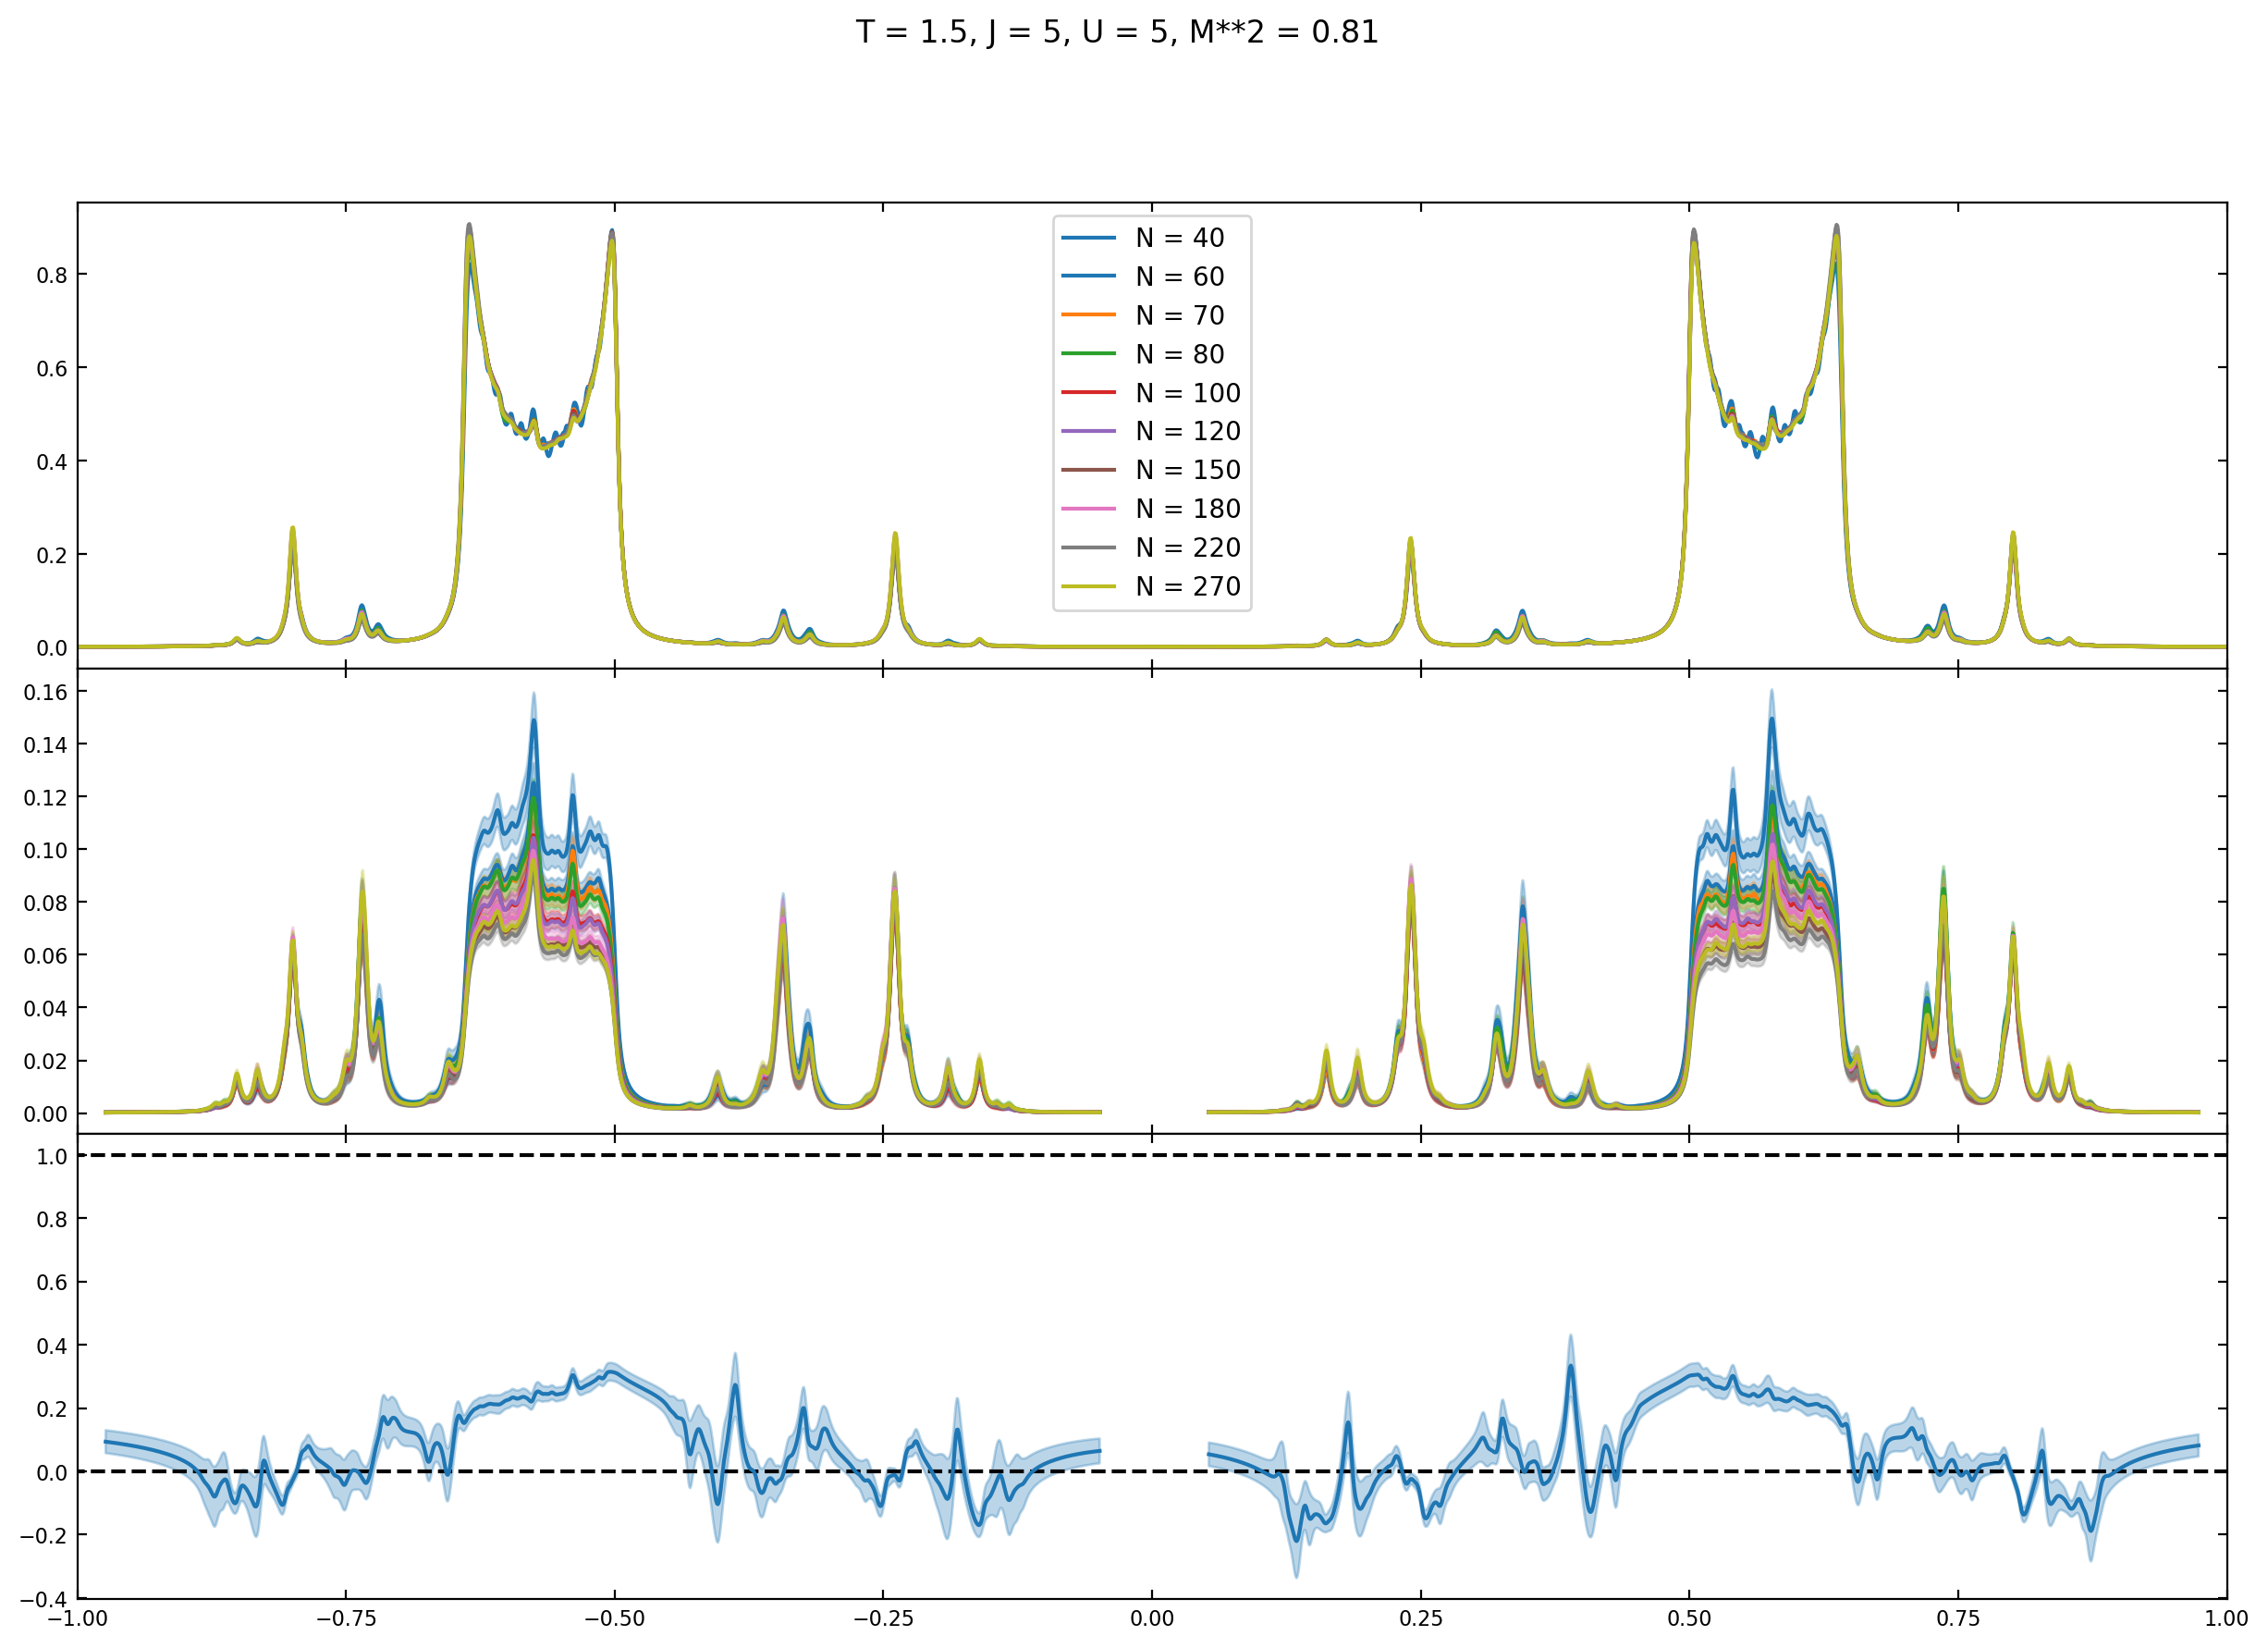

In [9]:
from FKMC.plotting import plot_scaling_dimension
o = o_local_runs[1]

f, axes = plot_scaling_dimension(
                       original_data = o,
                       filter_indices = None,
                       spread_IPR = True,
                       cutoffs = [0,],
                       DOS_cutoff = 0.001)

axes[0].legend()
axes[0].set(xlim = (-1, 1))
f.suptitle(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

T = 1.5, J = 5, U = 5, M**2 = 0.81


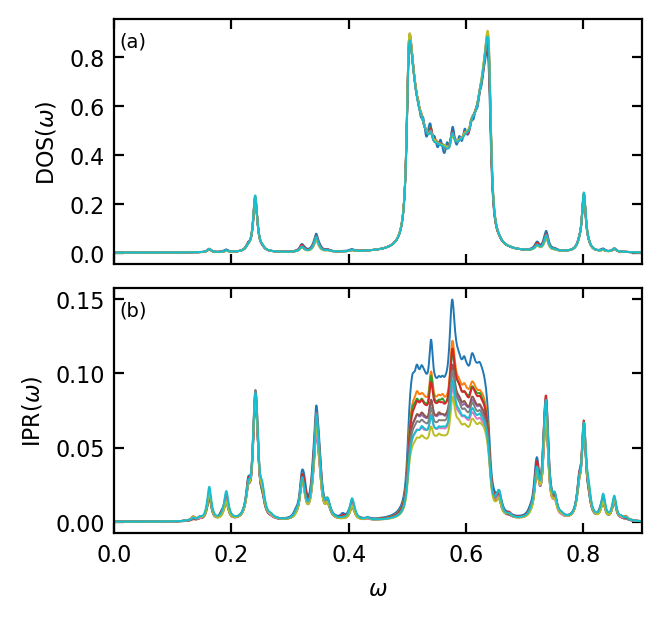

In [10]:
o = o_local_runs[1]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

f, axes = plt.subplots(2,1,sharex = True, gridspec_kw = dict(hspace = 0.1))
linewidth = 0.7

for i,N in zip(count(), o.Ns):
    axes[0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors[i], linewidth = linewidth) 
    axes[1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors[i], linewidth = linewidth)

axes[0].set(xlim = (0, 0.9))
    
axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

#axes[0].legend()

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.01, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge_low_temp.eps', bbox_inches='tight')

T = 2.5, J = 5, U = 5, M**2 = 0.04


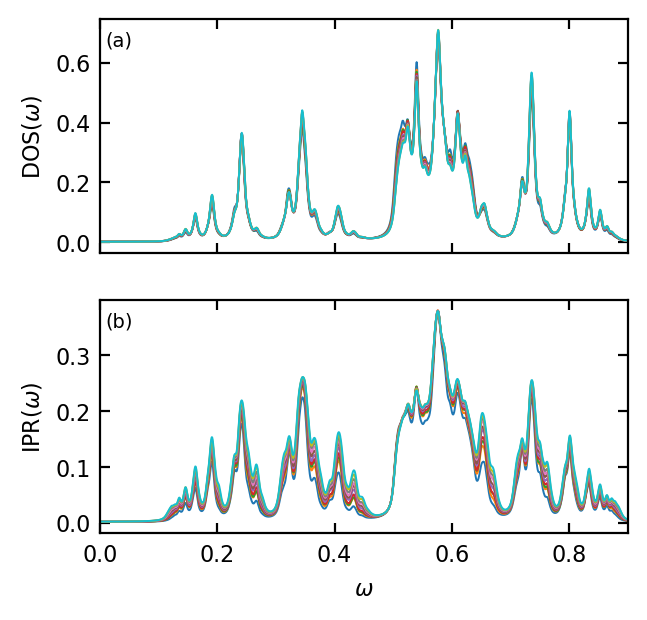

In [11]:
o = o_local_runs[2]
print(f'T = {1 / o.parameters.beta}, J = {o.parameters.J}, U = {o.parameters.U}, M**2 = {o.Mf_moments[-1, :, 2].mean():.2f}')

f, axes = plt.subplots(2,1,sharex = True)
linewidth = 0.7

for i,N in zip(count(), o.Ns):
    axes[0].plot(o.E_bins[1:] / o.parameters.U, o.DOS[i], label = f'N = {N}', color = colors[i], linewidth = linewidth) 
    axes[1].plot(o.E_bins[1:] / o.parameters.U, o.IPR[i], color = colors[i], linewidth = linewidth)

axes[0].set(xlim = (0, 0.9))
    
axes[0].set(ylabel = 'DOS($\omega$)')
axes[1].set(ylabel = 'IPR($\omega$)', xlabel = '$\omega$')

#axes[0].legend()

for a in axes: a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)"], axes):
    ax.text(0.01, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'black')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'mobility_edge_high_temp.eps', bbox_inches='tight')

In [12]:
%%script bash
cd ~/git/FK_short_paper
git add figs/*.eps
git status
git commit -m 'automated figure push'
git pull
git push

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   figs/band_opening.eps
	modified:   figs/binder_plot.eps
	modified:   figs/mobility_edge.eps
	modified:   figs/mobility_edge_high_temp.eps
	modified:   figs/mobility_edge_low_temp.eps
	modified:   figs/phase_diagram.eps
	modified:   figs/phase_diagram2.eps

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	figs/binder_plot.pdf
	figs/binder_plot2.pdf

[master 5bf7ed7] automated figure push
 7 files changed, 270 insertions(+), 312 deletions(-)
Merge made by the 'recursive' strategy.
 main.tex | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


From github.com:TomHodson/FK_short_paper
   b6858e2..d97bbd1  master     -> origin/master
To github.com:TomHodson/FK_short_paper.git
   d97bbd1..58c9d73  master -> master


In [13]:
#rsync -av cx1:~/HPC_data/pickled_data/ ~/HPC_data/pickled_data #needs the trailing slash

In [14]:
'''
from FKMC.general import smooth

width = columnwidth
height =  columnwidth
dpi = 150

f, axes = plt.subplots(2,2, sharey = 'all', sharex = 'all', gridspec_kw = dict(wspace = 0.1, hspace = 0.1))

with open( data_location / 'Long_range_IPR_and_DOS.pickle', 'rb') as file: LR_data = pickle.load(file)
with open(data_location / 'Short_range_IPR_and_DOS.pickle', 'rb') as file: SR_data = pickle.load(file)

#plot the E-T DOS Diagram

ax = axes[0,0]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(LR_data.I, scale = 0.7, axis = -1)
E = smooth(LR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'DOS\nT', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Long Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,0]
pcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = 'IPR\nT', xlabel = '$\omega$', xlim = (-4, 4))

ax = axes[0,1]
#norm = mpl.colors.Normalize(vmin=0, vmax=1)
I = smooth(SR_data.I, scale = 0.7, axis = -1)
E = smooth(SR_data.E_hist, scale = 0.7, axis = -1)

pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(ylabel = '', xlabel = '', ylim = (0.1,4), xlim = (-4, 4), title = 'Short Ranged')

    
#plot the E-T IPR diagram Diagram
ax = axes[1,1]
pcol = ax.pcolormesh(SR_data.E_bins, SR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)
ax.set(xlabel = '$\omega$', xlim = (-4, 4))

for a in axes.flatten(): a.tick_params(direction = "in")
  
for label, ax in zip(["(a)","(b)","(c)","(d)"], axes.flatten()):
    ax.text(0.03, 0.95, label, transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = 'white')

#f.subplots_adjust(bottom=0.2)
f.set_size_inches(width,height)
f.savefig(figure_location / 'band_opening_2.eps', bbox_inches='tight')
'''

'\nfrom FKMC.general import smooth\n\nwidth = columnwidth\nheight =  columnwidth\ndpi = 150\n\nf, axes = plt.subplots(2,2, sharey = \'all\', sharex = \'all\', gridspec_kw = dict(wspace = 0.1, hspace = 0.1))\n\nwith open( data_location / \'Long_range_IPR_and_DOS.pickle\', \'rb\') as file: LR_data = pickle.load(file)\nwith open(data_location / \'Short_range_IPR_and_DOS.pickle\', \'rb\') as file: SR_data = pickle.load(file)\n\n#plot the E-T DOS Diagram\n\nax = axes[0,0]\n#norm = mpl.colors.Normalize(vmin=0, vmax=1)\nI = smooth(LR_data.I, scale = 0.7, axis = -1)\nE = smooth(LR_data.E_hist, scale = 0.7, axis = -1)\n\npcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, E, cmap="RdBu_r", linewidth=0, rasterized = True)\nax.set(ylabel = \'DOS\nT\', xlabel = \'\', ylim = (0.1,4), xlim = (-4, 4), title = \'Long Ranged\')\n\n    \n#plot the E-T IPR diagram Diagram\nax = axes[1,0]\npcol = ax.pcolormesh(LR_data.E_bins, LR_data.Ts, I, cmap="RdBu_r", linewidth=0, rasterized = True)\nax.set(ylabel = \'IP

In [15]:
from scipy.linalg import eigh_tridiagonal
from scipy.linalg.lapack import dstev

def tridiagonal_diagonalisation_benchmark(M = 100, N = 250):
    '''
    diagonalise a system of size 250, 100 times and report how long it took.
    gives 1.6s on cx1
    '''
    t = time()
    states = np.random.choice([0,1], size = [M, N])
    e = -np.ones(N - 1)
    ds = 5*(states - 1/2)
    
    evals = np.zeros(shape = [M,N])
    evecs = np.zeros(shape = [M,N,N])
    
    for i in range(M):
        #evals[i], evecs[i] = eigh_tridiagonal(d = ds[i], e = e, lapack_driver = 'stev')
        evals[i], evecs[i], info =  dstev(d = ds[i], e = e, compute_v = True)
        
    return time() - t

tridiagonal_diagonalisation_benchmark(M = 1, N = 4000)

7.866880893707275

In [16]:
!cat /proc/cpuinfo | grep 'model name' | uniq

cat: /proc/cpuinfo: No such file or directory
